## HadUK Grid ##

Loading HadUK grid temperature obs for fidelity testing against over UK landmass.

NOTE: tas not available at daily timescale - only at Monthly timescale

In [1]:
# Local imports
import os
import sys
import time
import argparse
import calendar

# Third-party imports
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import shapely.geometry
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import iris

# Specific imports
from tqdm import tqdm
from datetime import datetime, timedelta

/home/users/benhutch/.conda/envs/bens-conda-env2/lib/python3.11/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [2]:
# Set up the directory in which the 1km monthly data is stored
data_dir = "/badc/ukmo-hadobs/data/insitu/MOHC/HadOBS/HadUK-Grid/v1.1.0.0/60km/tas/mon/v20220310/"

# Set up ythe test file
test_file_year = 1960

# Set up the path
test_file_path = os.path.join(
    data_dir,
    f"tas_hadukgrid_uk_60km_mon_{test_file_year}01-{test_file_year}12.nc",
)

# assert that the file exists
assert os.path.exists(test_file_path), f"File {test_file_path} does not exist"

# Load the data with iris
cube = iris.load_cube(test_file_path, "tas")

In [3]:
cube

Air Temperature (degC),time,projection_y_coordinate,projection_x_coordinate
Shape,12,23,17
Dimension coordinates,,,
time,x,-,-
projection_y_coordinate,-,x,-
projection_x_coordinate,-,-,x
Auxiliary coordinates,,,
month_number,x,-,-
season_year,x,-,-
latitude,-,x,x
longitude,-,x,x


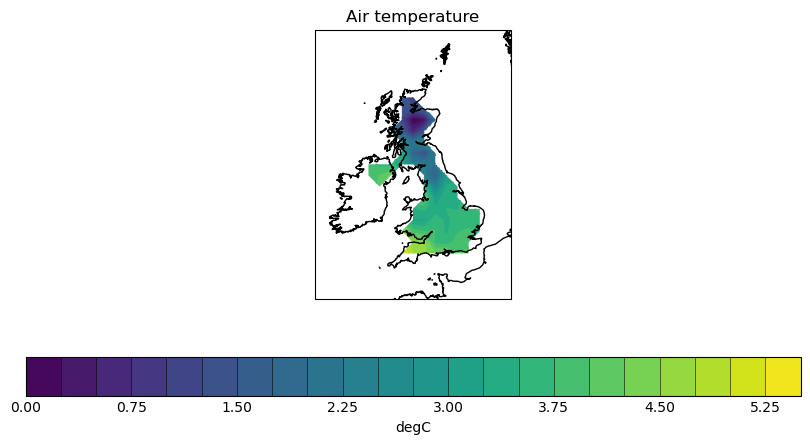

In [4]:
import iris.quickplot as qplt

fig = plt.figure(figsize=(10, 5))
qplt.contourf(cube[0, :, :], 25)
plt.gca().coastlines()

In [5]:
sys.path.append("/home/users/benhutch/unseen_functions")
from functions import load_model_data_xarray

In [6]:
# Load in an example model file
model_ds = load_model_data_xarray(
    model_variable="tas",
    model="HadGEM3-GC31-MM",
    experiment="dcppA-hindcast",
    start_year=1960,
    end_year=1960,
    first_fcst_year=1960,
    last_fcst_year=1960,
    months=[12, 1, 2],
    member="r1i1p1f2",
    frequency="Amon",
    parallel=False,
)

Model path: /gws/nopw/j04/canari/users/benhutch/dcppA-hindcast/data/tas/HadGEM3-GC31-MM/merged_files
The model path root is gws
Number of unique variant labels: 10
For model: HadGEM3-GC31-MM
First 10 unique variant labels: ['r10i1p1f2' 'r1i1p1f2' 'r2i1p1f2' 'r3i1p1f2' 'r4i1p1f2' 'r5i1p1f2'
 'r6i1p1f2' 'r7i1p1f2' 'r8i1p1f2' 'r9i1p1f2']
Number of unique variant labels: 10
Unique variant labels: ['r10i1p1f2' 'r1i1p1f2' 'r2i1p1f2' 'r3i1p1f2' 'r4i1p1f2' 'r5i1p1f2'
 'r6i1p1f2' 'r7i1p1f2' 'r8i1p1f2' 'r9i1p1f2']
First 10 model files: ['tas_Amon_HadGEM3-GC31-MM_dcppA-hindcast_s1960-r10i1p1f2_gn_196011-197103.nc', 'tas_Amon_HadGEM3-GC31-MM_dcppA-hindcast_s1960-r1i1p1f2_gn_196011-197103.nc', 'tas_Amon_HadGEM3-GC31-MM_dcppA-hindcast_s1960-r2i1p1f2_gn_196011-197103.nc', 'tas_Amon_HadGEM3-GC31-MM_dcppA-hindcast_s1960-r3i1p1f2_gn_196011-197103.nc', 'tas_Amon_HadGEM3-GC31-MM_dcppA-hindcast_s1960-r4i1p1f2_gn_196011-197103.nc', 'tas_Amon_HadGEM3-GC31-MM_dcppA-hindcast_s1960-r5i1p1f2_gn_196011-197103.nc'

Processing init years:   0%|          | 0/1 [00:00<?, ?it/s]

Processing init years: 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]


In [7]:
model_cube = model_ds["tas"].squeeze().to_iris()
obs_cube = cube

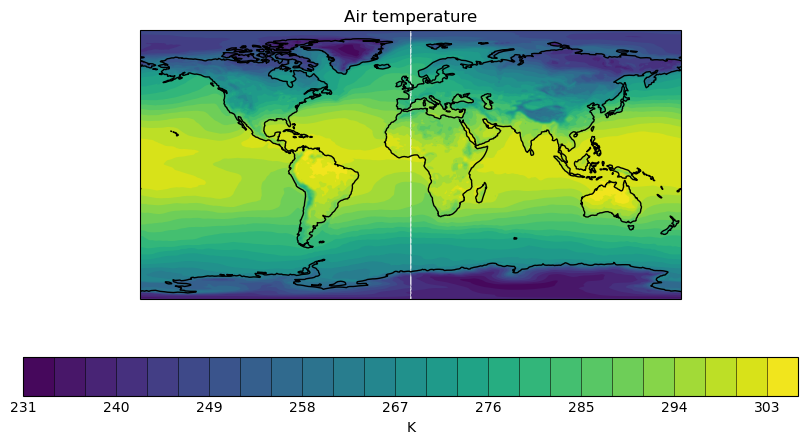

In [8]:
# Plot the model data
fig = plt.figure(figsize=(10, 5))
qplt.contourf(model_cube[0, :, :], 25)
plt.gca().coastlines()

In [9]:
obs_cube.coord("latitude").points

masked_array(
  data=[[48.78959642, 48.8454706 , 48.89568464, 48.94019972, 48.97898122,
         49.01199888, 49.03922684, 49.0606437 , 49.07623258, 49.0859812 ,
         49.08988185, 49.08793144, 49.08013152, 49.06648825, 49.0470124 ,
         49.02171932, 48.99062891],
        [49.32363884, 49.38056929, 49.43173466, 49.47709474, 49.51661366,
         49.55026008, 49.57800717, 49.59983278, 49.61571942, 49.62565434,
         49.62962955, 49.62764185, 49.61969285, 49.60578894, 49.58594128,
         49.56016578, 49.52848305],
        [49.85750609, 49.91551558, 49.96765293, 50.01387643, 50.05414894,
         50.08843793, 50.11671563, 50.13895904, 50.15515003, 50.16527538,
         50.16932681, 50.167301  , 50.15919962, 50.14502928, 50.12480157,
         50.09853299, 50.06624491],
        [50.39119312, 50.45030539, 50.5034362 , 50.55054233, 50.59158524,
         50.62653123, 50.65535146, 50.6780221 , 50.69452433, 50.70484442,
         50.7089738 , 50.70690902, 50.69865179, 50.684209  , 50.

In [48]:
np.shape(obs_cube.coord("projection_x_coordinate").points)

(17,)

In [49]:
np.shape(obs_cube.coord("projection_y_coordinate").points)

(23,)

In [50]:
np.shape(obs_cube.coord("longitude").points)

(23, 17)

In [51]:
np.shape(model_cube.coord("longitude").points)

(432,)

In [18]:
obs_lat = obs_cube.coord("latitude")
obs_lon = obs_cube.coord("longitude")

model_lat = model_cube.coord("latitude")
model_lon = model_cube.coord("longitude")

In [21]:
print(obs_lat.standard_name)
print(obs_lon.standard_name)

print(model_lat.standard_name)
print(model_lon.standard_name)

latitude
longitude
latitude
longitude


In [29]:
print(model_cube.coords(axis="X")[0])

DimCoord :  longitude / (degrees_east)
    points: [  0.41666666,   1.25      , ..., 358.74996948, 359.58331299]
    shape: (432,)
    dtype: float64
    standard_name: 'longitude'
    long_name: 'Longitude'
    var_name: 'lon'


In [23]:
print(model_cube.coords(axis="Y"))

[<DimCoord: latitude / (degrees_north)  [-89.722, ...]  shape(324,)>]


In [24]:
print(obs_cube.coords(axis="X"))

[<DimCoord: projection_x_coordinate / (m)  [-210000., ...]+bounds  shape(17,)>, <AuxCoord: longitude / (degrees)  [...]  shape(23, 17)>]


In [33]:
print(obs_cube.coords(axis="Y")[0].coord_system)

TransverseMercator(latitude_of_projection_origin=49.0, longitude_of_central_meridian=-2.0, false_easting=400000.0, false_northing=-100000.0, scale_factor_at_central_meridian=0.9996012717, ellipsoid=GeogCS(semi_major_axis=6377563.396, semi_minor_axis=6356256.909))


In [37]:
model_cube[0].coord(axis="X").coord_system = obs_cube.coords(axis="X")[0].coord_system
model_cube[0].coord(axis="Y").coord_system = obs_cube.coords(axis="Y")[0].coord_system

In [40]:
print(model_cube[0].coord(axis="X").coord_system)

None


In [41]:
print(obs_cube.coords(axis="X")[0].coord_system)

TransverseMercator(latitude_of_projection_origin=49.0, longitude_of_central_meridian=-2.0, false_easting=400000.0, false_northing=-100000.0, scale_factor_at_central_meridian=0.9996012717, ellipsoid=GeogCS(semi_major_axis=6377563.396, semi_minor_axis=6356256.909))


In [44]:
# # add the latitude and longitude coordinates as dimension coordinates
obs_cube.add_dim_coord(obs_lat, 1)

CannotAddError: The coordinate already exists on the cube. Duplicate coordinates are not permitted.

In [38]:
# regrid the obs data to the model grid
obs_cube_regrid = obs_cube.regrid(model_cube, iris.analysis.Linear())

ValueError: The rectilinear grid coordinates of the given cube and target grid must either both have coordinate systems or both have no coordinate system but with matching coordinate metadata.